# Natural Language Processing
**Natural Language Processing or NLP** is a branch of Artificial Intelligence which deal with bridging the machines understanding humans in their Natural Language. Natural Language can be in form of text or sound, which are used for humans to communicate each other. NLP can enable humans to communicate to machines in a natural way. 


**Text Classification** is a process involved in Sentiment Analysis. It is classification of peoples opinion or expressions into different sentiments. Sentiments include *Positive, Neutral*, and *Negative*, *Review Ratings* and *Happy, Sad*. Sentiment Analysis can be done on different consumer centered industries to analyse people's opinion on a particular product or subject. 
![Sentiment Analysis](https://media-exp1.licdn.com/dms/image/C4D12AQHPAZFZZxBtng/article-cover_image-shrink_600_2000/0?e=1593648000&v=beta&t=eQAR5WOihE2_ZCCAJbsgNyJlaI_GW7u8lDw45zGbfuU)
> Sentiment Classification is a perfect problem in NLP for getting started in it. You can really learn a lot of concepts and techniques to master through doing project. Kaggle is a great place to learn and contribute your own ideas and creations. I learnt lot of things from other, now it's my turn to make document my project.

I will go through all the key and fundament concepts of NLP and Sequence Models, which you will learn in this notebook. 
![Sentiment Analysis](https://fiverr-res.cloudinary.com/images/t_main1,q_auto,f_auto,q_auto,f_auto/gigs/121192228/original/677c209a0a064cb9253973d3663684acf91dab84/do-nlp-projects-with-python-nltk-gensim.jpg)
Let's get started with code without furthur ado.

<font color='red'> If you find this notebook helpful, please leave a UPVOTE to encourage me</font>

##  Importing Dependencies
   We shall start by importing all the neccessary libraries. I will explain the exact use of each library later in this notebook.

In [242]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)

Tensorflow Version 1.14.0


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CZ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#  Dataset Preprocessing
In this notebook, I am using **Sentiment-140** from [Kaggle](https://www.kaggle.com/kazanova/sentiment140). It contains a labels data of 1.6 Million Tweets and I find it a good amount of data to train our model.

In [243]:
df = pd.read_csv('BATA_All_News.csv')
df = df.dropna()
df = df.reset_index()
df.head()

,index,Date,News,Polarity,Sentiment,neg,neu,pos,compound,Cum
0,0,19 10 2012,PSM to be made profitable within next 18 month...,1,1,0.000,0.903,0.097,0.4404,1
1,1,19 10 2012,PAKSAT-1R provides internet services across Mi...,1,1,0.000,0.737,0.263,0.7579,1
2,2,20 10 2012,PPP seeks disqualification of Sharifs - LAHORE...,1,1,0.000,0.876,0.124,0.4019,1
3,3,20 10 2012,Fauji Fertilizer’s post-tax profit dips to Rs2...,1,1,0.000,0.812,0.188,0.7003,1
4,4,20 10 2012,NRL’s profit after tax down by Rs802.392mn - R...,1,1,0.062,0.749,0.189,0.5994,1


You can see the columns are without any proper names. Lets rename them for our reference

We are going to train only on text to classify its sentiment. So we can ditch the rest of the useless columns.

In [244]:
df.describe()

,index,Polarity,Sentiment,neg,neu,pos,compound,Cum
count,8797.000000,8797.000000,8797.000000,8797.000000,8797.000000,8797.000000,8797.000000,8797.000000
mean,4398.000000,0.085825,0.085825,0.088232,0.821962,0.089807,0.041665,0.085825
std,2539.619492,0.812043,0.812043,0.134439,0.146239,0.109450,0.506488,0.812043
min,0.000000,-1.000000,-1.000000,0.000000,0.123000,0.000000,-0.982600,-1.000000
25%,2199.000000,-1.000000,-1.000000,0.000000,0.738000,0.000000,-0.401900,-1.000000
50%,4398.000000,0.000000,0.000000,0.000000,0.837000,0.059000,0.000000,0.000000
75%,6597.000000,1.000000,1.000000,0.151000,0.928000,0.154000,0.476700,1.000000
max,8796.000000,1.000000,1.000000,0.806000,1.000000,0.773000,0.989700,1.000000


In [245]:
df['Polarity'].value_counts()


 1    3310
 0    2932
-1    2555
Name: Polarity, dtype: int64

Here are decoding the labels. We map **0 -> Negative and 1 -> Positive** as directed by the datset desciption. Now that we decoded we shall now analyse the dataset by its distribution. Because it's important that we have almost small amount of examples for given classes.

Positive: 3310 , Negative: 2555 , Neutral: 2932


Text(0.5, 1.0, 'Sentiment Data Distribution')

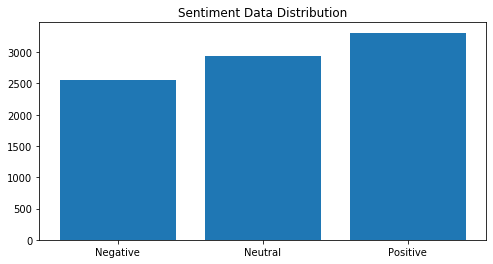

In [246]:
plt.figure(figsize=(8,4))
count_pos = df['Polarity'].value_counts()[1]
count_ntl = df['Polarity'].value_counts()[0]
count_neg = df['Polarity'].value_counts()[-1]

print('Positive:', count_pos, ',', 'Negative:', count_neg, ',', 'Neutral:', count_ntl)

plt.bar(['Negative', 'Neutral', 'Positive'], [count_neg, count_ntl, count_pos])
plt.title("Sentiment Data Distribution")

It's a very good dataset without any skewness. Thank Goodness.

Now let us explore the data we having here... 

In [247]:
import random
random_idx_list = [random.randint(1,len(df)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,index,Date,News,Polarity,Sentiment,neg,neu,pos,compound,Cum
2378,2378,14 03 2019,"RECORDER REPORT: PSX, BRIndex-30 update - KARA...",-1,-1,0.134,0.866,0.000,-0.5719,-1
4407,4407,11 08 2020,Power Division starts reviewing DISCOs perform...,1,1,0.065,0.699,0.236,0.7964,1
4729,4729,26 09 2013,"Quake survivors struggle for food, shelter",-1,-1,0.315,0.685,0.000,-0.3182,-1
5063,5063,25 02 2015,Struggling Younis denies retirement tweet,-1,-1,0.651,0.349,0.000,-0.6808,-1
6080,6080,09 10 2014,Greek unemployment eases to 26.4pc in July - A...,0,0,0.095,0.757,0.148,0.1531,0
3277,3277,05 12 2019,GSP Plus status: Over 25 EU members to support...,1,1,0.000,0.871,0.129,0.6705,1
6894,6894,05 02 2020,Activities at Karachi and Port Qasim - The Kar...,0,0,0.036,0.964,0.000,-0.2023,0
4821,4821,24 02 2014,Moenjodaro ‘in danger’ after the Sindh Festival,1,1,0.000,0.652,0.348,0.4939,1
5144,5144,28 10 2015,"Rescue, relief work yet to begin in remote Mal...",1,1,0.000,0.556,0.444,0.7506,1
251,251,30 11 2013,"ACWA-led consortium to finance, build Saudi Ra...",1,1,0.000,0.882,0.118,0.4939,1


Looks like we have a nasty data in text. Because in general we use lot of punctuations and other words without any contextual meaning. It have no value as feature to the model we are training. So we need to get rid of them.

# Text Preprocessing
Tweet texts often consists of other user mentions, hyperlink texts, emoticons and punctuations. In order to use them for learning using a Language Model. We cannot permit those texts for training a model. So we have to clean the text data using various preprocessing and cleansing methods. Let's continue
![Data Science Meme](https://miro.medium.com/max/800/1*Xhm9c9qDfXa3ZCQjiOvm_w.jpeg)


### Stemming/ Lematization
For grammatical reasons, documents are going to use different forms of a word, such as *write, writing and writes.* Additionally, there are families of derivationally related words with similar meanings. The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.

Stemming usually refers to a process that chops off the ends of words in the hope of achieving goal correctly most of the time and often includes the removal of derivational affixes. 

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base and dictionary form of a word
![Stemming and Lematization](https://qph.fs.quoracdn.net/main-qimg-cd7f4bafaa42639deb999b1580bea69f)

### Hyperlinks and Mentions
Twitter is a social media platform where people can tag and mentions other people's ID and share videos and blogs from internet. So the tweets often contain lots of Hyperlinks and twitter mentions.

- Twitter User Mentions - Eg. @arunrk7, @andrewng
- Hyperlinks - Eg. https://keras.io, https://tensorflow.org

### Stopwords
Stopwords are commonly used words in English which have no contextual meaning in an sentence. So therefore we remove them before classification. Some stopwords are...
![Stopwords English](https://4.bp.blogspot.com/-yiEr-jCVv38/Wmk10d84DYI/AAAAAAAAk0o/IfgjfjpgrxM5NosUQrGw7PtLvgr6DAG8ACLcBGAs/s1600/Screen%2BShot%2B2018-01-24%2Bat%2B5.41.21%2BPM.png)

That looks like a tedious process, isn't?. Don't worry there is always some library in Python to do almost any work. The world is great!!!

**NLTK** is a python library which got functions to perform text processing task for NLP.



In [248]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [249]:
def preprocess(text, stem=False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [250]:
df.text = df['News'].apply(lambda x: preprocess(x))

C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


**Aaww.. It is clean and tidy now. Now let's see some word cloud visualizations of it.**

### Positive Words

      index        Date                                               News  \
0         0  19 10 2012  PSM to be made profitable within next 18 month...   
2950   2950  19 11 2019  Two universities to be established with China'...   
2937   2937  19 11 2019  Provision of quality education, heath facility...   
2938   2938  19 11 2019  Pakistan fully supported, facilitated Western ...   
2939   2939  19 11 2019  Govt reforms bearing fruit, says PM after surp...   
...     ...         ...                                                ...   
1535   1535  20 06 2016  India eases foreign investment rules for airli...   
6873   6873  19 01 2020  Govt to complete its constitutional tenure: Go...   
6102   6102  01 09 2012  LCCI urges govt to withdraw hike in POL prices...   
6875   6875  18 11 2020  Dr Pervez Chaudhry removed as head of surgery ...   
6874   6874  01 08 2014     High tide engulfs Karachi's seaside picnickers   

      Polarity  Sentiment  neg    neu    pos  compound  Cum  
0

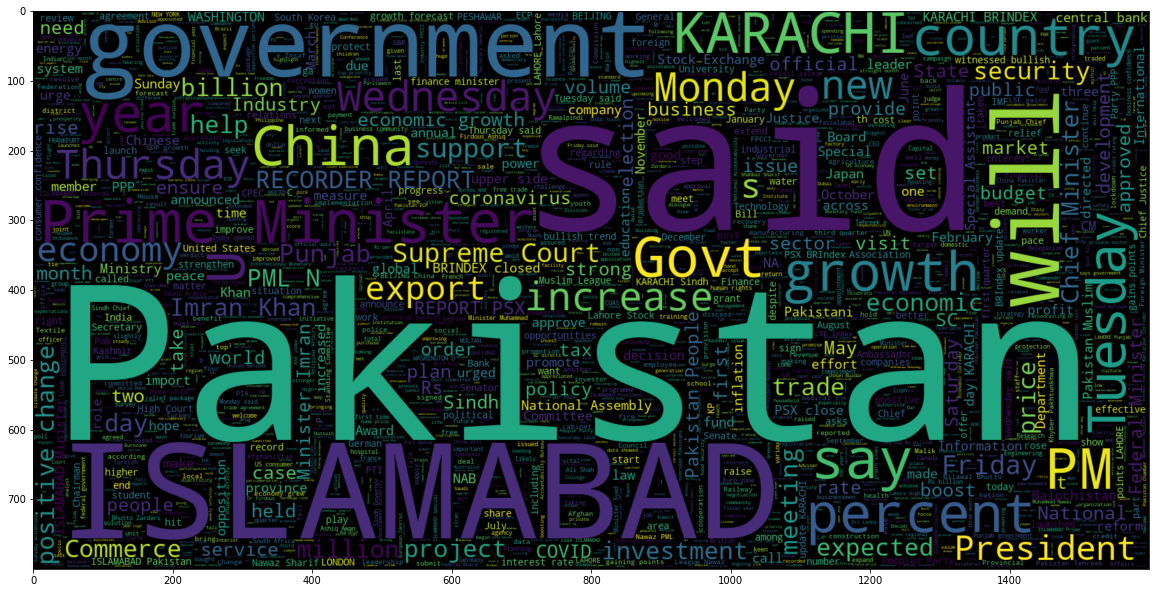

In [251]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
temp = df.sort_values(by=['Polarity'], ascending = False)
print(temp[0:count_pos+4])
text = ' '.join(temp["News"][0:count_pos])


    
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(text)
plt.imshow(wc , interpolation = 'bilinear')

### Neutral Words

      index        Date                                               News  \
6873   6873  19 01 2020  Govt to complete its constitutional tenure: Go...   
6102   6102  01 09 2012  LCCI urges govt to withdraw hike in POL prices...   
6875   6875  18 11 2020  Dr Pervez Chaudhry removed as head of surgery ...   
6874   6874  01 08 2014     High tide engulfs Karachi's seaside picnickers   
6872   6872  02 05 2018  Is there a community more beleaguered in Pakis...   
...     ...         ...                                                ...   
5984   5984  25 12 2011                      Nawaz tempers ire with wishes   
5988   5988  13 02 2015  Steps being taken to improve gas pressure - KA...   
5987   5987  23 10 2020  Abdul Basit questions Maulana Ashrafi’s appoin...   
5985   5985  18 09 2017  Shipping activity at Port Qasim - KARACHI: Thr...   
5986   5986  06 04 2018  Govt mulls over launching health cards for lab...   

      Polarity  Sentiment    neg    neu    pos  compound  Cum  

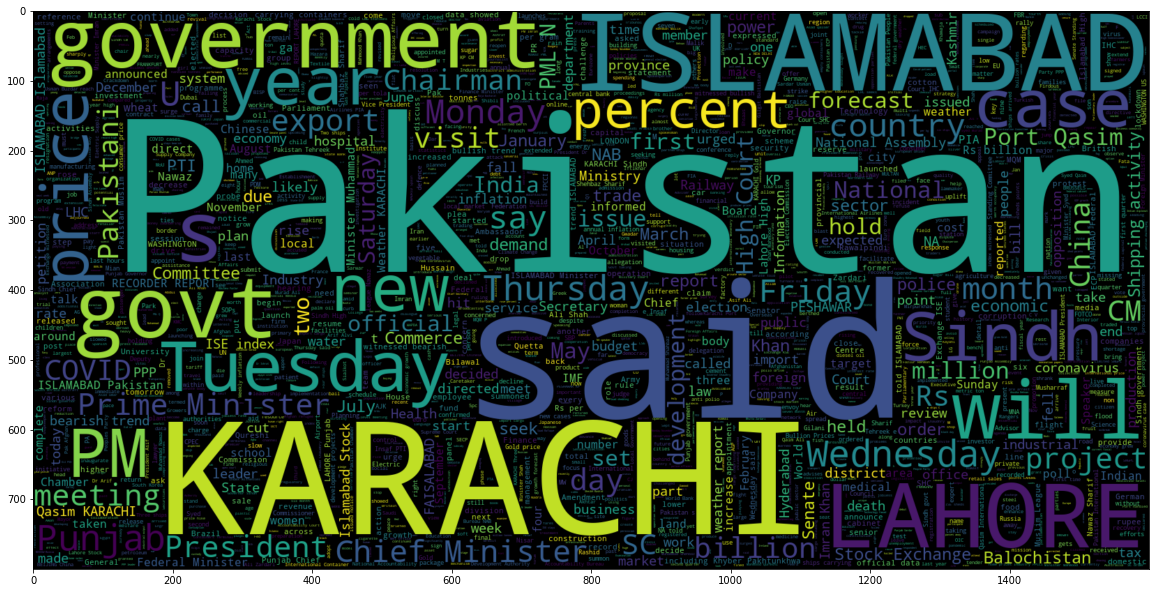

In [252]:
plt.figure(figsize = (20,20)) 
temp = df.sort_values(by=['Polarity'], ascending = False)
print(temp[count_pos:count_pos + count_ntl])
text = ' '.join(temp["News"][count_pos:count_pos + count_ntl])


    
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(text)
plt.imshow(wc , interpolation = 'bilinear')

### Negative Words

      index        Date                                               News  \
3613   3613  31 01 2020  Illegal award of government ads: Indictment of...   
3619   3619  01 02 2020  Indian troops martyr 21 Kashmiris in Jan 2020 ...   
3618   3618  01 02 2020  President visits Jam Madad to condole his moth...   
3617   3617  01 02 2020  Civilian injured in unprovoked Indian firing a...   
3616   3616  31 01 2020  Industrialisation to help resolve economic pro...   
...     ...         ...                                                ...   
4740   4740  29 09 2013                     US drone kills six in Pakistan   
4739   4739  29 09 2013    Former SHO arrested in Arshad Pappu murder case   
4738   4738  28 09 2013  Pakistan shows serious concern on timing of Ja...   
4737   4737  28 09 2013       Women forced to have unsafe abortions: study   
5419   5419  07 02 2018  Mashal Khan: Lighting a flame in our hearts by...   

      Polarity  Sentiment    neg    neu    pos  compound  Cum  

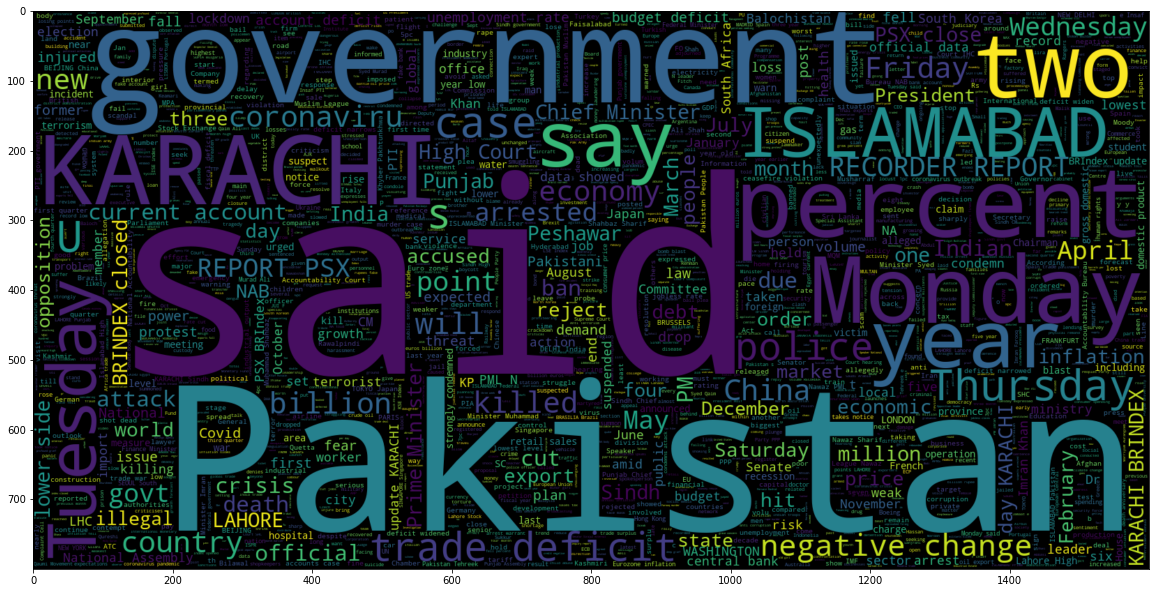

In [253]:
plt.figure(figsize = (20,20)) 
temp = df.sort_values(by=['Polarity'], ascending = False)
print(temp[count_pos + count_ntl:])
text = ' '.join(temp["News"][count_pos + count_ntl:])


    
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(text)
plt.imshow(wc , interpolation = 'bilinear')

## Train and Test Split

In [254]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 100

In [255]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))
print(test_data)

Train Data size: 7037
Test Data size 1760
      index        Date                                               News  \
6611   6611  07 04 2015  Every inch of state land to be retrieved :CM -...   
4975   4975  25 08 2014                TTP commander killed in Tirah blast   
6234   6234  16 06 2020  Pakistan to set its own standard for electroni...   
5387   5387  15 01 2018  NAB files review petition on SC's rejection of...   
1144   1144  02 04 2015  US factory orders rise, offer glimmer of hope ...   
...     ...         ...                                                ...   
6956   6956  31 08 2016  Bullion Prices on Wednesday - KARACHI: Followi...   
3302   3302  07 12 2019  FCCI chief for declaring industrial units' clo...   
4655   4655  11 05 2013  Bomb explodes near election camp in Kuchlak in...   
217     217  07 11 2013  Australian unemployment steady at 5.7pc - SYDN...   
54       54  04 04 2013  Pakistan, France need to enhance cooperation: ...   

      Polarity  Senti

`train_test_split` will shuffle the dataset and split it to gives training and testing dataset. It's important to shuffle our dataset before training.

In [256]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7037 entries, 5464 to 537
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      7037 non-null   int64  
 1   Date       7037 non-null   object 
 2   News       7037 non-null   object 
 3   Polarity   7037 non-null   int64  
 4   Sentiment  7037 non-null   int64  
 5   neg        7037 non-null   float64
 6   neu        7037 non-null   float64
 7   pos        7037 non-null   float64
 8   compound   7037 non-null   float64
 9   Cum        7037 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 604.7+ KB


# Tokenization
Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called *tokens* , perhaps at the same time throwing away certain characters, such as punctuation. The process is called **Tokenization.**
![Tokenization](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/11/tokenization.png)

`tokenizer` create tokens for every word in the data corpus and map them to a index using dictionary.

`word_index` contains the index for each word

`vocab_size` represents the total number of word in the data corpus

In [257]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['News'])

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 16045


Now we got a `tokenizer` object, which can be used to covert any word into a Key in dictionary (number).

Since we are going to build a sequence model. We should feed in a sequence of numbers to it. And also we should ensure there is no variance in input shapes of sequences. It all should be of same lenght. But texts in tweets have different count of words in it. To avoid this, we seek a little help from `pad_sequence` to do our job. It will make all the sequence in one constant length `MAX_SEQUENCE_LENGTH`.

In [258]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data['News']),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data['News']),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (7037, 100)
Testing X Shape: (1760, 100)


### Label Encoding 
We are building the model to predict class in enocoded form (0 or 1 as this is a binary classification). We should encode our training labels to encodings.

In [259]:
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(train_data['Polarity'], num_classes=3)
test_labels = to_categorical(test_data['Polarity'], num_classes=3)
#labels = np.argmax(labels, axis=1)
print(train_data[:10])
print(train_labels[:10])

      index        Date                                               News  \
5464   5464  06 03 2018  NAB okays inquiries against those named in Pan...   
8192   8192  06 08 2018  PTI to nominate Imran Khan as prime minister t...   
7050   7050  27 09 2016  ‘Couple’s CNICs be made a must to check child ...   
3106   3106  29 11 2019  Farogh Naseem once again sworn in as Law Minis...   
5754   5754  06 01 2020  Editorial: The country is now crying out for l...   
3349   3349  10 12 2019  Cabinet issues directives for concrete steps t...   
6607   6607  01 07 2020  IMC donates Rs10m to Indus Hospital - KARACHI:...   
2867   2867  15 11 2019  AML, CFT framework: Errant AMC told to furnish...   
2547   2547  29 08 2019  US growth revised down slightly in Q2 as busin...   
7389   7389  15 12 2020  Bilawal salutes APS students on 6th martyrdom ...   

      Polarity  Sentiment    neg    neu    pos  compound  Cum  
5464         1          1  0.000  0.721  0.279    0.4767    1  
8192         

In [260]:
y_train = train_labels
y_test = test_labels
#y_train = y_train.reshape(-1,1)
#y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print(y_test)

y_train shape: (7037, 3)
y_test shape: (1760, 3)
[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


# Word Emdedding
In Language Model, words are represented in a way to intend more meaning and for learning the patterns and contextual meaning behind it. 

**Word Embedding** is one of the popular representation of document vocabulary.It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.

Basically, it's a feature vector representation of words which are used for other natural language processing applications.

We could train the embedding ourselves but that would take a while to train and it wouldn't be effective. So going in the path of Computer Vision, here we use **Transfer Learning**. We download the pre-trained embedding and use it in our model.

The pretrained Word Embedding like **GloVe & Word2Vec** gives more insights for a word which can be used for classification. If you want to learn more about the Word Embedding, please refer some links that I left at the end of this notebook.


In this notebook, I use **GloVe Embedding from Stanford AI** which can be found [here](https://nlp.stanford.edu/projects/glove/)

In [261]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove.6B.zip


In [262]:
GLOVE_EMB = 'glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 32
EPOCHS = 10
MODEL_PATH = 'best_model.hdf5'

In [263]:
embeddings_index = {}

f = open(GLOVE_EMB, encoding="utf8")
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [264]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [265]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

# Model Training - LSTM
We are clear to build our Deep Learning model. While developing a DL model, we should keep in mind of key things like Model Architecture, Hyperparmeter Tuning and Performance of the model.

As you can see in the word cloud, the some words are predominantly feature in both Positive and Negative tweets. This could be a problem if we are using a Machine Learning model like Naive Bayes, SVD, etc.. That's why we use **Sequence Models**.

### Sequence Model
![Sequence Model](https://miro.medium.com/max/1458/1*SICYykT7ybua1gVJDNlajw.png)

Reccurent Neural Networks can handle a seqence of data and learn a pattern of input seqence to give either sequence or scalar value as output. In our case, the Neural Network outputs a scalar value prediction. 

For model architecture, we use

1) **Embedding Layer** - Generates Embedding Vector for each input sequence.

2) **Conv1D Layer** - Its using to convolve data into smaller feature vectors. 

3) **LSTM** - Long Short Term Memory, its a variant of RNN which has memory state cell to learn the context of words which are at further along the text to carry contextual meaning rather than just neighbouring words as in case of RNN.

4) **Dense** - Fully Connected Layers for classification


In [266]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential

In [267]:
print((x_train.shape, y_train.shape, x_test.shape, y_test.shape))

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
#x = Sequential()
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5)(x)
x = Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(3, activation='softmax')(x)
print(outputs)
model = tf.keras.Model(sequence_input, outputs)
print(model.summary())

((7037, 100), (7037, 3), (1760, 100), (1760, 3))
Tensor("dense_58/Softmax:0", shape=(?, 3), dtype=float32)
Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 100)]             0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 100, 300)          4813500   
_________________________________________________________________
spatial_dropout1d_26 (Spatia (None, 100, 300)          0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 96, 64)            96064     
_________________________________________________________________
bidirectional_26 (Bidirectio (None, 64)                24832     
_________________________________________________________________
dense_56 (Dense)             (None, 512)               33280     
_________________

### Optimization Algorithm
This notebook uses Adam, optimization algorithm for Gradient Descent. You can learn more about Adam [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)

### Callbacks
Callbacks are special functions which are called at the end of an epoch. We can use any functions to perform specific operation after each epoch. I used two callbacks here,

- **LRScheduler** - It changes a Learning Rate at specfic epoch to achieve more improved result. In this notebook, the learning rate exponentionally decreases after remaining same for first 10 Epoch.

- **ModelCheckPoint** - It saves best model while training based on some metrics. Here, it saves the model with minimum Validity Loss.

In [268]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='categorical_crossentropy',
              metrics=['acc'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

Let's start training... It takes a heck of a time if training in CPU, be sure your GPU turned on... May the CUDA Cores be with you....

In [269]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Training on CPU...


In [270]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Train on 7037 samples, validate on 1760 samples
Epoch 1/10
7037/7037 [==============================] - 74s 10ms/sample - loss: 0.9752 - acc: 0.5087 - val_loss: 0.8298 - val_acc: 0.6324
Epoch 2/10
7037/7037 [==============================] - 65s 9ms/sample - loss: 0.7991 - acc: 0.6456 - val_loss: 0.7588 - val_acc: 0.6636
Epoch 3/10
7037/7037 [==============================] - 65s 9ms/sample - loss: 0.7219 - acc: 0.6859 - val_loss: 0.7204 - val_acc: 0.6767
Epoch 4/10
7037/7037 [==============================] - 66s 9ms/sample - loss: 0.6624 - acc: 0.7159 - val_loss: 0.7438 - val_acc: 0.6665
Epoch 5/10
7037/7037 [==============================] - 66s 9ms/sample - loss: 0.6061 - acc: 0.7469 - val_loss: 0.7368 - val_acc: 0.6926
Epoch 6/10
7037/7037 [==============================] - 67s 10ms/sample - loss: 0.5586 - acc: 0.7607 - val_loss: 0.7499 - val_acc: 0.6915
Epoch 7/10
7037/7037 [==============================] - 65s 9ms/sample - loss: 0.5407 - acc: 0.7731 - val_loss: 0.7344 - val_acc

# Model Evaluation
Now that we have trained the model, we can evaluate its performance. We will some evaluation metrics and techniques to test the model.

Let's start with the Learning Curve of loss and accuracy of the model on each epoch.

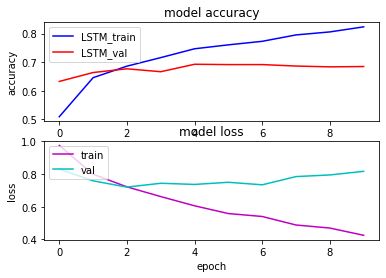

In [271]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['acc'], c= 'b')
at.plot(history.history['val_acc'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

The model will output a prediction score between 0 and 1. We can classify two classes by defining a threshold value for it. In our case, I have set 0.5 as THRESHOLD value, if the score above it. Then it will be classified as **POSITIVE** sentiment.

In [272]:
def decode_sentiment(score):
    if score[0] > score[1] and score[0] > score[2]:
        print(score[0], '0\n---')
        return 0
    elif score[1] > score[0] and score[1] > score[2]:
        print(score[1], '1\n---')
        return 1
    elif score[2] > score[0] and score[2] > score[1]:
        print(score[2], '-1\n---')
        return -1

scores = model.predict(x_test, verbose=1, batch_size=10)
print(scores)
y_pred_1d = [decode_sentiment(score) for score in scores]

1760/1760 [==============================] - 11s 6ms/sample
[[9.0490687e-01 7.1556702e-02 2.3536446e-02]
 [3.1542003e-02 3.9190092e-04 9.6806604e-01]
 [1.1492402e-01 8.6474317e-01 2.0332806e-02]
 ...
 [7.8669172e-03 5.1888586e-05 9.9208117e-01]
 [1.1247056e-01 2.7164398e-03 8.8481301e-01]
 [6.5403787e-04 9.9934524e-01 6.6525860e-07]]
0.90490687 0
---
0.96806604 -1
---
0.8647432 1
---
0.70901734 0
---
0.93478423 1
---
0.6124666 -1
---
0.83437204 1
---
0.60240424 -1
---
0.9953276 1
---
0.965424 1
---
0.62021935 -1
---
0.91646606 1
---
0.9702535 0
---
0.99245316 1
---
0.41593826 -1
---
0.7284176 1
---
0.6650074 1
---
0.5150515 1
---
0.517082 0
---
0.5150812 0
---
0.8658132 1
---
0.47032285 0
---
0.7841547 0
---
0.7245527 -1
---
0.99840444 -1
---
0.44118455 1
---
0.54896015 1
---
0.54411227 1
---
0.98824453 -1
---
0.9088247 -1
---
0.89505494 1
---
0.5112044 0
---
0.89927685 0
---
0.86047006 0
---
0.41471618 0
---
0.9250395 -1
---
0.933938 0
---
0.7211205 1
---
0.93072814 1
---
0.9788466 -1

### Confusion Matrix
Confusion Matrix provide a nice overlook at the model's performance in classification task

In [273]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

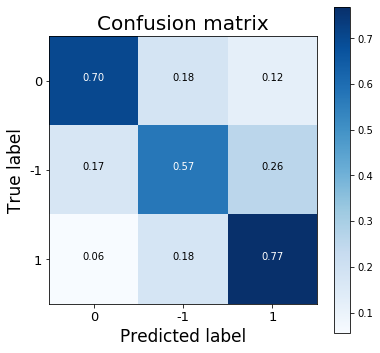

In [274]:
cnf_matrix = confusion_matrix(test_data['Polarity'].to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data['Polarity'].unique(), title="Confusion matrix")
plt.show()

### Classification Scores

In [275]:
print(classification_report(list(test_data['Polarity']), y_pred_1d))

              precision    recall  f1-score   support

          -1       0.72      0.70      0.71       496
           0       0.61      0.57      0.59       577
           1       0.72      0.77      0.74       687

    accuracy                           0.68      1760
   macro avg       0.68      0.68      0.68      1760
weighted avg       0.68      0.68      0.68      1760



It's a pretty good model we trained here in terms of NLP. Around 80% accuracy is good enough considering the baseline human accuracy also pretty low in these tasks. Also, you may go on and explore the dataset, some tweets might have other languages than English. So our Embedding and Tokenizing wont have effect on them. But on practical scenario, this model is good for handling most tasks for Sentiment Analysis.

<h3>Some of the resource and people who help me learn some concepts</h3>
<font color='#008080'>
    <ul>
        <li> <b>Andrew NG's Seqence Model Course</b> at <a href="https://www.coursera.org/learn/nlp-sequence-models"> Coursera</a> </li>
    
<li> <b>Andrej Karpathy's Blog</b> on <a href="http://karpathy.github.io/2015/05/21/rnn-effectiveness/">Effectiveness of RNN</a></li>

<li> <b>Intuitive Understanding of GloVe Embedding</b> on <a href="https://towardsdatascience.com/light-on-math-ml-intuitive-guide-to-understanding-glove-embeddings-b13b4f19c010">TDS</a></li>

<li> <b>Keras tutorial on Word Embedding</b> <a href="https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html"> here</a></li>

</ul>
</font>

> <font color='#696969'>I got to say like you, I am still at learning phase in terms of NLP. I have got lot to learn in future. I found that writing this notebook even though it is done by lot of people before me helps me with a deeper and complete understanding our the concepts that I am learning. Kaggle has been a amazing place to learn from and contribute to community of Data Science Aspirants.</font>

<h2><font color='red'> If you find this notebook usefull kindly UPVOTE this notebook. I am new to writting notebooks hope that would really encourage me to write and learn more.</font></h2>

<h5>Thanks in Advance. Have a nice day. Learn more and Happy Kaggle</h5>